In [1]:
using DrWatson
quickactivate(pwd(), "LArAnalysis")
using DelimitedFiles, CairoMakie, Statistics, Dates, Printf, LArCal

include(srcdir("cal_helpers.jl"));

LED Results

In [2]:
led_results = custom_parse.(readdlm(datadir("cal_results", "led.txt"); comments=true))
led_results = sortslices(led_results, dims=1);

Cobalt Tail Results

In [3]:
cotail_results = custom_parse.(readdlm(datadir("cal_results", "cotail.txt"); comments=true))
cotail_results = sortslices(cotail_results, dims=1);

Plot the time-evolution of LED fits, main is just the main DEAP gamma function, mean is the exponential + main + secondary DEAP gamma functions

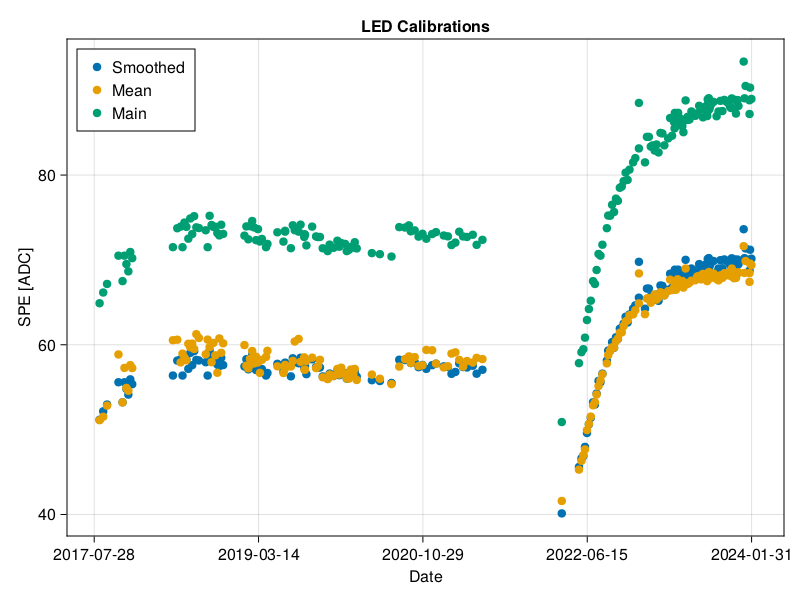

In [4]:
xtic = LinRange(datetime2unix(DateTime(2017, 7, 28)), datetime2unix(now()), 5)
xticd = unix2datetime.(xtic)
xticd = Dates.format.(xticd, "yyyy-mm-dd")
fig = Figure()
ax = Axis(fig[1, 1], xticks=(xtic, xticd), title="LED Calibrations", xlabel="Date", ylabel="SPE [ADC]")
scatter!(led_results[:, 2], led_results[:, 7], label="Smoothed")
scatter!(led_results[:, 2], led_results[:, 3], label="Mean")
scatter!(led_results[:, 2], led_results[:, 4], label="Main")
axislegend(position=:lt)
fig

Cobalt tail results

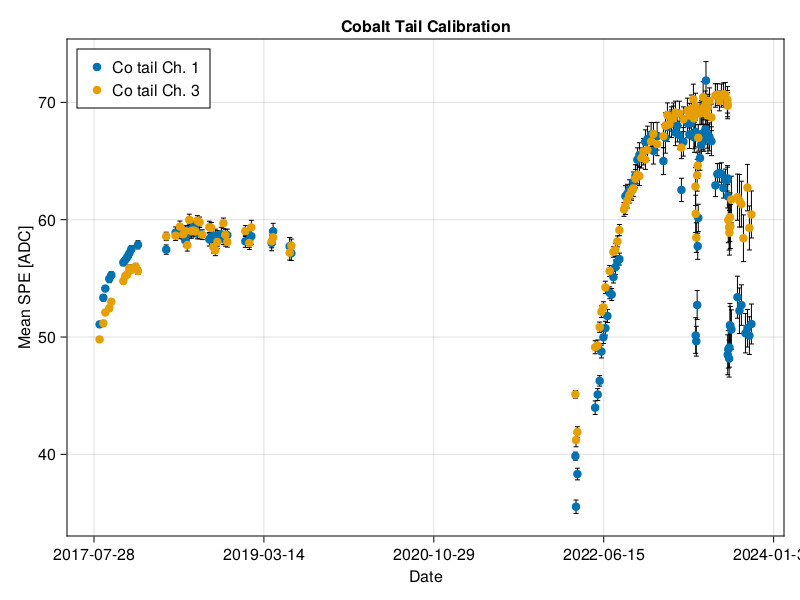

In [5]:
cotail1_mask = .~(ismissing.(cotail_results[:, 3]))
cotail1_x = cotail_results[:, 2][cotail1_mask]
cotail1_y = cotail_results[:, 3][cotail1_mask]
cotail1_err = cotail_results[:, 4][cotail1_mask]
cotail3_mask = .~(ismissing.(cotail_results[:, 6]))
cotail3_x = cotail_results[:, 2][cotail3_mask]
cotail3_y = cotail_results[:, 6][cotail3_mask]
cotail3_err = cotail_results[:, 7][cotail3_mask]

fig = Figure()
ax = Axis(fig[1, 1], xticks=(xtic, xticd), title="Cobalt Tail Calibration", xlabel="Date", ylabel="Mean SPE [ADC]")
errorbars!(cotail1_x, cotail1_y, cotail1_err, linewidth=1, whiskerwidth=5)
errorbars!(cotail3_x, cotail3_y, cotail3_err, linewidth=1, whiskerwidth=5)
scatter!(cotail1_x, cotail1_y, label="Co tail Ch. 1")
scatter!(cotail3_x, cotail3_y, label="Co tail Ch. 3")
axislegend(position=:lt)
fig

Show all results with the fitted results

In [6]:
spe_fit = readdlm(datadir("cal_results", "spe.txt"); comments=true)
d1 = DateTime(2020, 7, 24) |> datetime2unix
d2 = DateTime(2021, 5, 31) |> datetime2unix
d3 = DateTime(2022, 1, 21) |> datetime2unix
d4 = now() |> datetime2unix
fit1_mask = (spe_fit[:, 1] .< d1)
fit2_mask = (spe_fit[:, 1] .< d2) .& (spe_fit[:, 1] .> d1)
fit3_mask = (spe_fit[:, 1] .< d4) .& (spe_fit[:, 1] .> d3);

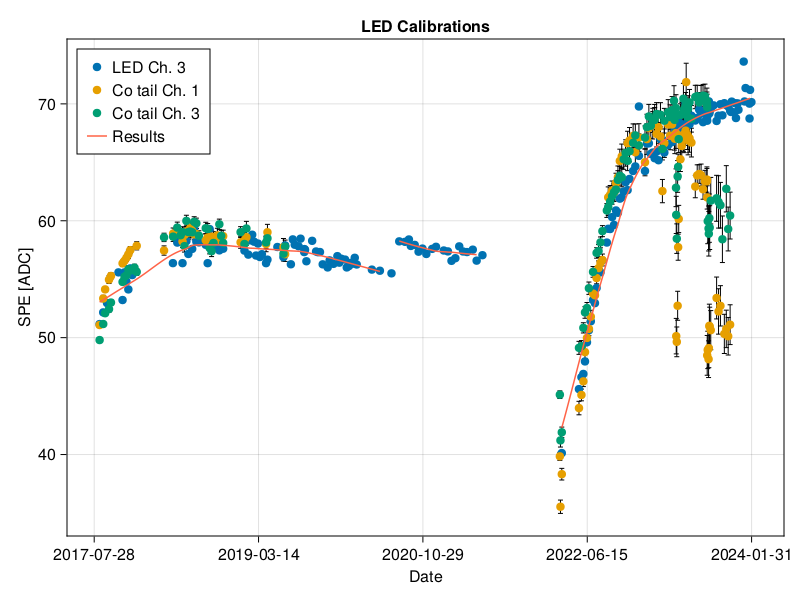

In [7]:
fig = Figure()
ax = Axis(fig[1, 1], xticks=(xtic, xticd), title="LED Calibrations", xlabel="Date", ylabel="SPE [ADC]")
errorbars!(cotail1_x, cotail1_y, cotail1_err, linewidth=1, whiskerwidth=5)
errorbars!(cotail3_x, cotail3_y, cotail3_err, linewidth=1, whiskerwidth=5)
scatter!(led_results[:, 2], led_results[:, 7], label="LED Ch. 3")
scatter!(cotail1_x, cotail1_y, label="Co tail Ch. 1")
scatter!(cotail3_x, cotail3_y, label="Co tail Ch. 3")
lines!(spe_fit[:, 1][fit1_mask], spe_fit[:, 3][fit1_mask], label="Results", color=:tomato)
lines!(spe_fit[:, 1][fit2_mask], spe_fit[:, 3][fit2_mask], color=:tomato)
lines!(spe_fit[:, 1][fit3_mask], spe_fit[:, 3][fit3_mask], color=:tomato)
axislegend(position=:lt)
fig

Zoomed into the most recent calibrations

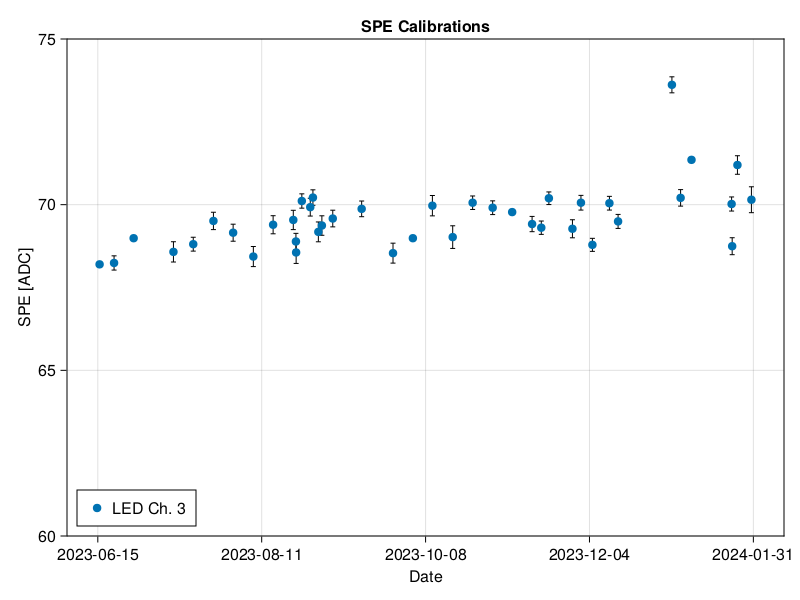

In [8]:
start = datetime2unix(DateTime(2023, 6, 15))
xtic = LinRange(start, datetime2unix(now()), 5)
xticd = unix2datetime.(xtic)
xticd = Dates.format.(xticd, "yyyy-mm-dd")
cotail1mask = cotail1_x .> start
cotail3mask = cotail3_x .> start
ledmask = (led_results[:, 2] .> start) .& .~(ismissing.(led_results[:, 3]))
ledx = convert(Vector{Float64}, led_results[:, 2][ledmask])
ledy = convert(Vector{Float64}, led_results[:, 7][ledmask])
lederr = convert(Vector{Float64}, led_results[:, 5][ledmask])
fig = Figure()
ax = Axis(fig[1, 1], xticks=(xtic, xticd), title="SPE Calibrations", xlabel="Date", ylabel="SPE [ADC]")
# errorbars!(cotail1_x[cotail1mask], cotail1_y[cotail1mask], cotail1_err[cotail1mask], linewidth=1, whiskerwidth=5)
# errorbars!(cotail3_x[cotail3mask], cotail3_y[cotail3mask], cotail3_err[cotail3mask], linewidth=1, whiskerwidth=5)
errorbars!(ledx, ledy, lederr, linewidth=1, whiskerwidth=5)
scatter!(led_results[:, 2][ledmask], led_results[:, 7][ledmask], label="LED Ch. 3")
# scatter!(cotail1_x[cotail1mask], cotail1_y[cotail1mask], label="Co tail Ch. 1")
# scatter!(cotail3_x[cotail3mask], cotail3_y[cotail3mask], label="Co tail Ch. 3")
ylims!(60, 75)
axislegend(position=:lb)
fig

In [9]:
dt = Dates.format(now(), "yyyymmdd")
save(plotsdir("spe_$dt.png"), fig)

CairoMakie.Screen{IMAGE}
